In [3]:
import h5py #Hazel output uses this format
import matplotlib.pyplot as plt 
import numpy as np 
from astropy.io import fits

Let's start by visualizing our observations.

In [4]:
stokes = fits.open("/home/milic/data/10830/straylight.29sep17.011.4d.fits")[0].data
ll = fits.open("/home/milic/data/10830/straylight.29sep17.011.4d.fits")[1].data

In [6]:
stokes.shape

(436, 250, 4, 1010)

In [7]:
ll.shape

(1010,)

Looks great! Now let's look at the continuum image and at the mean spectrum. As usual.

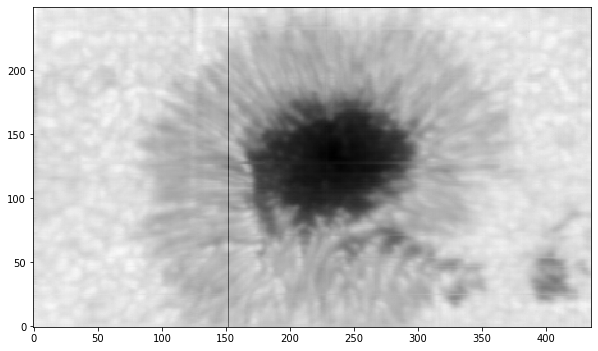

In [14]:
plt.figure(figsize=[10,7])
plt.imshow(stokes[:,:,0,0].T,origin='lower',cmap='gray')

Loevely sunspot! Can you estimate spatial sampling / resolution?

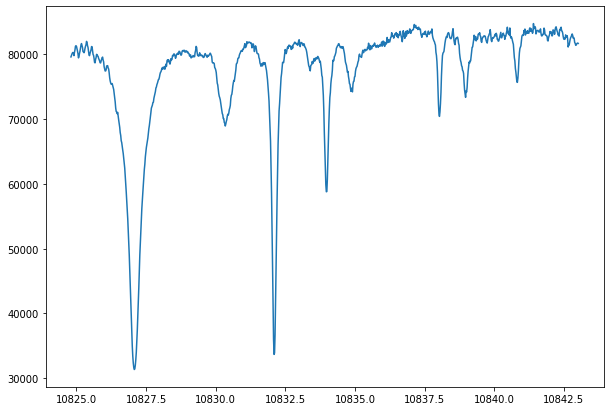

In [15]:
mean = np.mean(stokes,axis=(0,1))
plt.figure(figsize=[10,7])
plt.plot(ll,mean[0])

Let's zoom a bit and see our candidates here.

(10825, 10832)

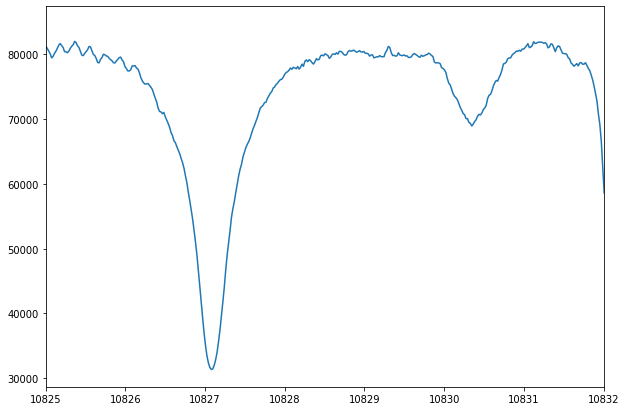

In [16]:
mean = np.mean(stokes,axis=(0,1))
plt.figure(figsize=[10,7])
plt.plot(ll,mean[0])
plt.xlim([10825,10832])

Left one is the Si 10827 line, formed in photosphere and temperature minimum. Shabby looking one is infamous 10830. Let's look at the two example spectra. Say... one from the sunspot and one from the quiet Sun?

(10825, 10832)

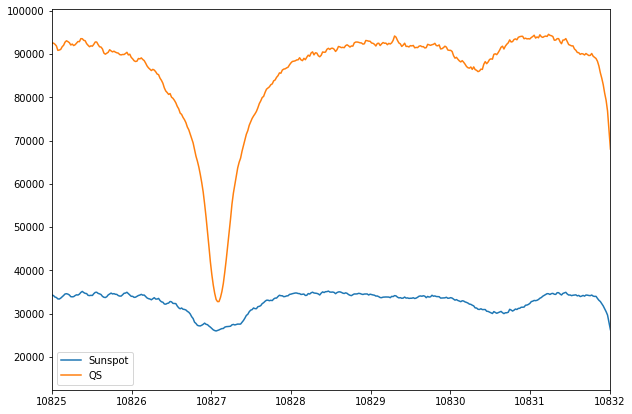

In [23]:
plt.figure(figsize=[10,7])
plt.plot(ll,stokes[230,130,0],label='Sunspot')
plt.plot(ll,stokes[50,220,0],label='QS')
plt.legend()
plt.xlim([10825,10832])


Maybe better to look at them normalized w.r.t their maximum, to see differences in line shapes :-)

(10825, 10832)

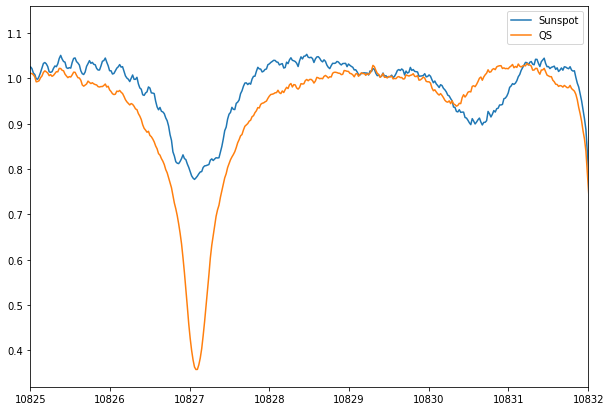

In [24]:
plt.figure(figsize=[10,7])
plt.plot(ll,stokes[230,130,0]/np.mean(stokes[230,130,0,:10]),label='Sunspot')
plt.plot(ll,stokes[50,220,0]/np.mean(stokes[50,220,0,:10]),label='QS')
plt.legend()
plt.xlim([10825,10832])


### Very interesting. Let's spend ~ 5 minutes informally chating and visualizing our data. As our friend Andres Asensio Ramos says, you should be able to understand some things just from looking at the data. For example, I want to have a look at Stokes V signals!

In [25]:
#Let's first take a look where we except Stokes V to peak:

(0, 400)

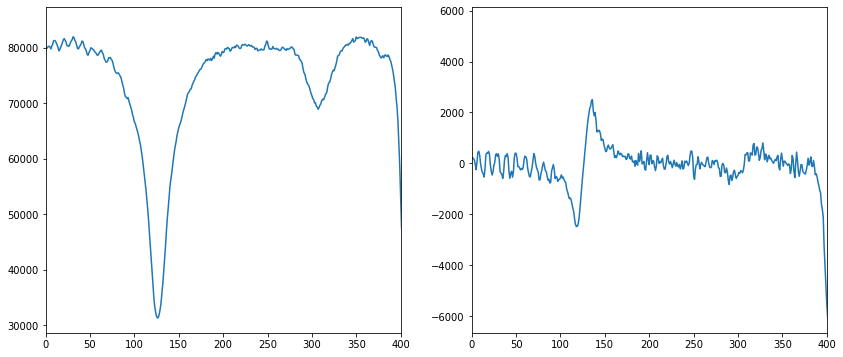

In [30]:
plt.figure(figsize=[14,6])
plt.subplot(121)
plt.plot((mean[0]))
plt.xlim([0,400])
plt.subplot(122)
plt.plot(np.gradient(mean[0]))
plt.xlim([0,400])

Note the differences between the lines, 10830 is so much diffferent form Si I 10827!

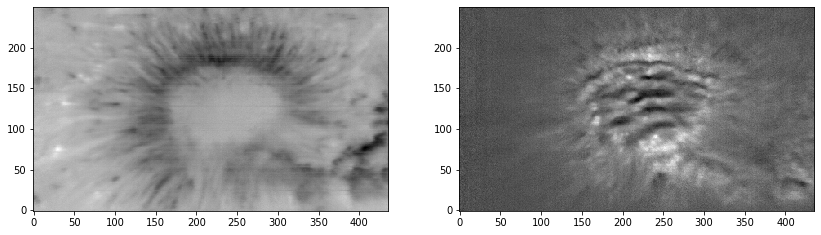

In [32]:
plt.figure(figsize=[14,6])
plt.subplot(121)
plt.imshow(stokes[:,:,3,130].T/np.mean(mean[0,:10]),origin='lower',cmap='gray')
plt.subplot(122)
plt.imshow(stokes[:,:,3,300].T/np.mean(mean[0,:10]),origin='lower',cmap='gray')

These look very very very weird! What is this? For that we need to go and interpret the observations. That is, talk a bit about inversions and look at the results.

Recall our model:
![Model](model.png "Model")

# Part 2 : Inversion results! 

In [34]:
#Inversion results are packed as the h5py file. We can access them with:
fit = h5py.File('output_full_map_he_si.h5','r')

In [36]:
#What is this now? Now this is an object, with various keys :-)
fit.keys()

<KeysViewHDF5 ['ch1', 'ph1', 'spec1']>

These correspond, recpectively, to the chromosphere model (slab for 10830), photosphere model (full atmospheres and nodes), and the spectrum!

In [40]:
ph = fit.get('ph1')
ph.keys()

<KeysViewHDF5 ['Bx', 'Bx_err', 'Bx_nodes', 'By', 'By_err', 'By_nodes', 'Bz', 'Bz_err', 'Bz_nodes', 'T', 'T_err', 'T_nodes', 'ff', 'ff_err', 'ff_nodes', 'log_tau', 'v', 'v_err', 'v_nodes', 'vmac', 'vmac_err', 'vmac_nodes', 'vmic', 'vmic_err', 'vmic_nodes']>

In [41]:
#wow a lot of data! Let's explore this, step-by-step. Let's, for example take a look at one of the atmospheres

In [42]:
log_tau = np.squeeze(ph["log_tau"])

In [43]:
log_tau.shape

(73,)

In [44]:
print (log_tau)

[ 1.2  1.1  1.   0.9  0.8  0.7  0.6  0.5  0.4  0.3  0.2  0.1  0.  -0.1
 -0.2 -0.3 -0.4 -0.5 -0.6 -0.7 -0.8 -0.9 -1.  -1.1 -1.2 -1.3 -1.4 -1.5
 -1.6 -1.7 -1.8 -1.9 -2.  -2.1 -2.2 -2.3 -2.4 -2.5 -2.6 -2.7 -2.8 -2.9
 -3.  -3.1 -3.2 -3.3 -3.4 -3.5 -3.6 -3.7 -3.8 -3.9 -4.  -4.1 -4.2 -4.3
 -4.4 -4.5 -4.6 -4.7 -4.8 -4.9 -5.  -5.1 -5.2 -5.3 -5.4 -5.5 -5.6 -5.7
 -5.8 -5.9 -6. ]


Ok makes, sense, let's look at, for example, the temperature!

In [45]:
T = np.squeeze(ph["T"])
T.shape

(109000, 2, 73)

First is pixel, second is number of cycles (I will explain you what this means), last is for the number of depth points:

In [51]:
# First let's reshape this:
T = T.reshape(436,250,2,73)
T.shape

(436, 250, 2, 73)

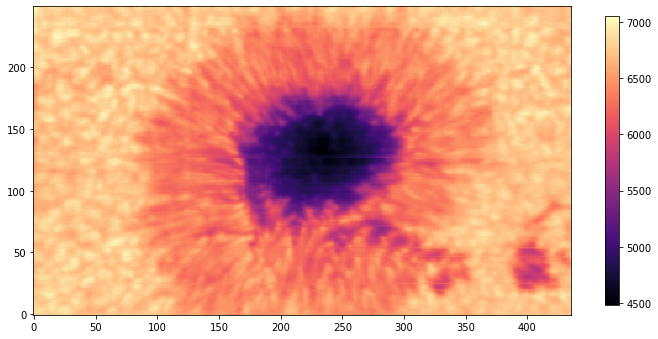

In [61]:
plt.figure(figsize=[10,7])
plt.imshow(T[:,:,1,12].T,cmap='magma',origin='lower')
plt.colorbar(shrink=0.6)
plt.tight_layout()

We get the actual numbers here! Let's look some other atmospheric layers.

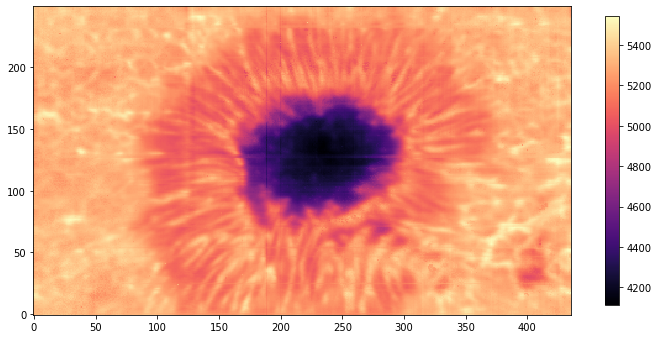

In [62]:
plt.figure(figsize=[10,7])
plt.imshow(T[:,:,1,22].T,cmap='magma',origin='lower')
plt.colorbar(shrink=0.6)
plt.tight_layout()

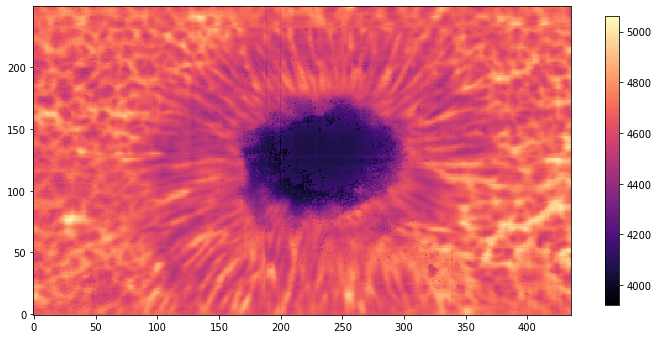

In [63]:
plt.figure(figsize=[10,7])
plt.imshow(T[:,:,1,32].T,cmap='magma',origin='lower')
plt.colorbar(shrink=0.6)
plt.tight_layout()

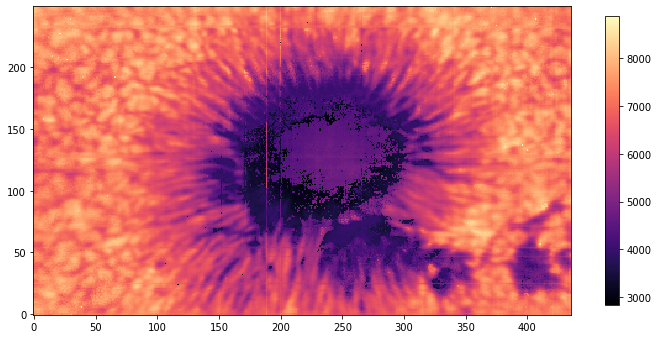

In [66]:
plt.figure(figsize=[10,7])
plt.imshow(T[:,:,1,71].T,cmap='magma',origin='lower')
plt.colorbar(shrink=0.6)
plt.tight_layout()

This one is meaningless!!

Let's now look at the atmospheric structure of these two pixels we had a look at earlier:

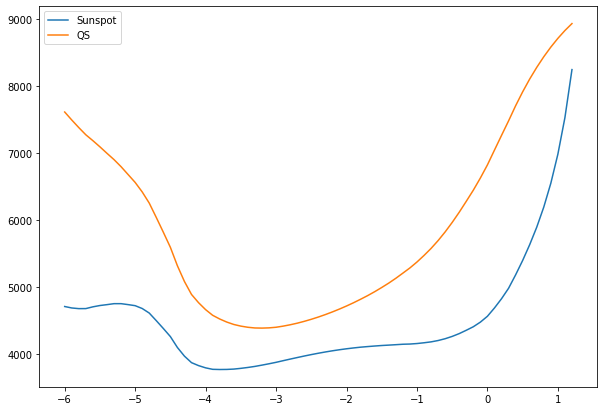

In [67]:
plt.figure(figsize=[10,7])
plt.plot(log_tau,T[230,130,1],label='Sunspot')
plt.plot(log_tau,T[50,220,1],label='QS')
plt.legend()

WOW! 

Now let's explore further...